# DataFrame
- Series가 1차원이라면 DataFrame은 2차원으로 확대된 버젼
- Excel의 spreadsheet과 같은 역할
- 2차원이기 때문에 인덱스가 row, column으로 구성됨
    - row는 각 개별 데이터를, column은 개별 속성을 의미
- Data Analysis, Machine Learning에서 data 변형을 위해 가장 많이 사용.

In [1]:
import pandas as pd

In [151]:
train_data = pd.read_csv('./data/train.csv')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### dataframe 데이터 파악하기
- shape 속성 (row, column)
- describe 함수 - 숫자형 데이터의 통계치 게산
- info 함수 - 데이터 타입, 각 아이템의 개수 등 출력

In [6]:
train_data.shape

(891, 12)

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 인덱스와 컬럼

#### 인덱스
- index 속성
- 각 아이템을 특정할 수 있는 고유의 값을 저장
- 복잡한 데이터의 경우, 멀티 인덱스로 표현 가능

In [11]:
train_data.index

RangeIndex(start=0, stop=891, step=1)

#### 컬럼
- column 속성
- 각각의 특성(feature)을 나타냄
- 복잡한 데이터의 경우, 멀티 컬럼으로 표현 가능

In [13]:
# 어떤 타입의 변수가 있는지 확인 가능
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### DF 생성하기
- dictionary로부터 생성하기
    - 1) dict의 key -> column

In [15]:
data = {'a' : 100, 'b' : 200, 'c' : 300}
pd.DataFrame(data, index=['x', 'y', 'z'])

,a,b,c
x,100,200,300
y,100,200,300
z,100,200,300


In [16]:
data = {'a' : [1,2,3], 'b' : [4,5,6], 'c' : [7,8,9]}
pd.DataFrame(data, index=['x', 'y', 'z'])

,a,b,c
x,1,4,7
y,2,5,8
z,3,6,9


- Series로부터 생성하기
    - 2) 각 Series의 인덱스 -> column

In [19]:
a = pd.Series([100, 200, 300], ['a','b','c'])
b = pd.Series([110, 230, 350], ['a','b','c'])
c = pd.Series([120, 240, 360], ['a','b','c'])
d = pd.Series([120, 240, 360], ['a','k','e'])

pd.DataFrame([a,b,c,d])

,a,b,c,k,e
0,100.0,200.0,300.0,NaN,NaN
1,110.0,230.0,350.0,NaN,NaN
2,120.0,240.0,360.0,NaN,NaN
3,120.0,NaN,NaN,240.0,360.0


- CSV 데이터로 DataFrame 생성
    - 데이터 분석을 위해, dataframe을 생성하는 가장 일반적인 방법
    - 데이터 소스로부터 추출된 csv 파일로부터 생성
    - pandas.read_csv 함수 사용

#### read_csv 함수 파라미터
- sep - 각 데이터 값을 구별하기 위한 구분자(separator) 설정
- header - header를 무시할 경우, None 설정
- index_col - index로 사용할 column 설정
- usecols - 실제로 dataframe에 로딩할 columns만 설정

In [25]:
train_data = pd.read_csv('./data/train.csv', index_col = 'PassengerId', usecols=['PassengerId', 'Survived', 'Pclass', 'Name'])
train_data

,Survived,Pclass,Name
PassengerId,,,
1,0,3,"Braund, Mr. Owen Harris"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,1,3,"Heikkinen, Miss. Laina"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,0,3,"Allen, Mr. William Henry"
...,...,...,...
887,0,2,"Montvila, Rev. Juozas"
888,1,1,"Graham, Miss. Margaret Edith"
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie"""


### Column 선택하기
- 기본적으로 [ ]는 column을 추출
- 컬럼 인덱스일 경우 인덱스의 리스트 사용 가능
    - 리스트를 전달할 경우 결과는 Dataframe
    - 하나의 컬럼명을 전달할 경우 결과는 Series

In [26]:
train_data = pd.read_csv('./data/train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 하나의 컬럼 선택하기

In [29]:
# DataFrame은 대괄호 안에 값이 하나만 존재한다면 그 값은 Index가 아닌 Column이 된다.
train_data['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### 복수의 컬럼 선택하기

In [33]:
# 대괄호를 하나 더 추가하게 되면 DataFrame 형태로 원하는 Column을 가져온다.
train_data[['Survived', 'Pclass', 'Age']]

,Survived,Pclass,Age
0,0,3,22.0
1,1,1,38.0
2,1,3,26.0
3,1,1,35.0
4,0,3,35.0
...,...,...,...
886,0,2,27.0
887,1,1,19.0
888,0,3,NaN
889,1,1,26.0


### dataframe slicing
- dataframe의 경우 기본적으로 [ ] 연산자가 column 선택에 사용
- 하지만, slicing은 row 레벨로 지원

In [35]:
train_data[7:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### row 선택하기
- Series의 경우 [ ]로 row 선택이 가능하나, Dataframe의 경우 기본적으로 column을 선택하도록 설계
- .loc, .iloc로 row 선택 가능
    - loc - 인덱스 자체를 사용.
    - iloc - 0 based index로 사용
    - 이 두 함수는 ,를 사용하여 column 선택도 가능

In [37]:
# 0 based index
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
import numpy as np

In [41]:
train_data.index = np.arange(100, 991)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
101,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
102,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
103,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
104,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
train_data.loc[986:988]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
986,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
987,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
988,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S


In [44]:
train_data.loc[[986, 910, 103, 102]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
986,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
910,811,0,3,"Alexander, Mr. William",male,26.0,0,0,3474,7.8875,NaN,S
103,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
102,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [45]:
# 인덱스 번호와 관계 없이 0번째 있는 리스트를 가져옴. iloc.
train_data.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 100, dtype: object

- loc : 존재하는 index를 그대로 가져옴.
- iloc : index와 상관 없이 ~번째의 index를 가져옴.

### row, column 동시에 선택하기
- loc, iloc 속성을 이용할 때, 콤마를 이용하여 둘 다 명시 가능.

In [46]:
train_data.loc[[986, 910, 103, 102], ['Survived', 'Name', 'Age']]

,Survived,Name,Age
986,0,"Montvila, Rev. Juozas",27.0
910,0,"Alexander, Mr. William",26.0
103,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
102,1,"Heikkinen, Miss. Laina",26.0


In [49]:
train_data.iloc[[0, 100, 2, 200], [1, 4, 5]] # 1, 4, 5번째 column

,Survived,Sex,Age
100,0,male,22.0
200,0,female,28.0
102,1,female,26.0
300,0,male,28.0


### boolean selection으로 row 선택하기
- numpy에서와 동일한 방식으로 해당 조건에 맞는 row 선택

### 30대이면서 1등석에 탄 사람 선택하기

In [53]:
class_ = train_data['Pclass'] == 1
age_ = (train_data['Age'] >= 30) & (train_data['Age'] < 40)

In [55]:
train_data[class_ & age_]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
101,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
103,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
161,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
237,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
315,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
318,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
324,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
330,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
348,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S
357,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S


### 새 column 추가하기
- [  ] 사용하여 추가하기
- insert 함수 사용하여 원하는 위치에 추가하기

In [62]:
train_data = pd.read_csv('./data/train.csv')

In [63]:
train_data['Age_double'] = train_data['Age'] * 2
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,44.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,52.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,70.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,70.0


- 3번째 순서에 Fare10 이라는 Column 만들기

In [64]:
train_data.insert(3, 'Fare10', train_data['Fare'] / 10)
train_data.head()

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double
0,1,0,3,0.72500,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,44.0
1,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.0
2,3,1,3,0.79250,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,52.0
3,4,1,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,70.0
4,5,0,3,0.80500,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,70.0


### Column 삭제하기
- drop 함수 사용하여 삭제
    - 리스트를 활용하여 멀티플 삭제 가능

In [66]:
train_data.drop('Age_double', axis=1) # axis가 0과 1로 존재, 행 열로 나뉨.
train_data.head() # 복사본을 생성한 것이기 때문에 원본 데이터에는 남아있음.

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_double
0,1,0,3,0.72500,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,44.0
1,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,76.0
2,3,1,3,0.79250,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,52.0
3,4,1,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,70.0
4,5,0,3,0.80500,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,70.0


In [68]:
train_data.drop(['Age_double', 'Fare10'], axis=1, inplace=True) # axis가 0과 1로 존재, 행 열로 나뉨.
train_data.head() # 원본에 있는 데이터까지 삭제

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 변수(column) 사이의 상관계수(correlation)
- corr 함수를 통해 상관계수 연산(-1, 1 사이의 결과)
    - 연속성(숫자형)데이터에 대해서만 연산
    - 인과관계를 의미하진 않음.
    
- a와 b의 상관계수가 1에 가까울 수록 a가 증가하면 b도 증가함을 보임.

In [70]:
train_data.corr() # 같은 변수에 대해 연산하기 때문에 대각선은 항상 1임.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- 생존자를 예측하려고 할 때, 절대값이 가장 큰 것은 Class와 Fare이며, 큰 영향을 미친다 볼 수 있음.

In [71]:
# matplotlib 응용
import matplotlib.pyplot as plt

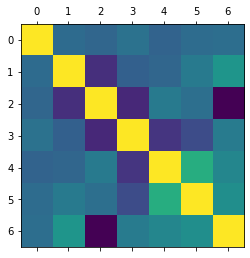

In [74]:
# 색깔이 밝을 수록 관계가 깊다.
plt.matshow(train_data.corr())

### NaN값 확인
- info 함수를 통하여 개수 확인
- isna 함수를 통해 boolean 타입으로 확인

In [75]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
train_data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [77]:
# 특정 컬럼 확인
train_data['Age'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

### NaN 처리 방법
- 데이터에서 삭제
    - dropna 함수
- 다른 값으로 치환
    - fillna 함수

- NaN 데이터 삭제하기

In [79]:
# NaN으로 구성된 행 삭제
train_data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [80]:
train_data.dropna(subset=['Age']) # Age 항목만 확인하여 삭제

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [81]:
# 전체에서 하나라도 NaN이 있다면 삭제
train_data.dropna(axis=1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


- NaN 값 대체하기
    - 평균으로 대체하기
    - 생존자/사망자 별 평균으로 대체하기

In [84]:
train_data['Age'].fillna(train_data['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [90]:
# 생존자 나이 평균
mean1 = train_data[train_data['Survived'] == 1]['Age'].mean()

# 사망자 평균
mean2 = train_data[train_data['Survived'] == 0]['Age'].mean()

print(mean1, mean2)

28.343689655172415 30.62617924528302


In [91]:
train_data[train_data['Survived'] == 1]['Age'].fillna(mean1)
train_data[train_data['Survived'] == 0]['Age'].fillna(mean2)

0      22.000000
4      35.000000
5      30.626179
6      54.000000
7       2.000000
         ...    
884    25.000000
885    39.000000
886    27.000000
888    30.626179
890    32.000000
Name: Age, Length: 549, dtype: float64

In [92]:
# 원본 데이터에 대입하기
train_data.loc[train_data['Survived'] == 1, 'Age'] = train_data[train_data['Survived'] == 1]['Age'].fillna(mean1)
train_data.loc[train_data['Survived'] == 0, 'Age'] = train_data[train_data['Survived'] == 0]['Age'].fillna(mean2)

In [96]:
train_data[train_data['Age'] == 28.343689655172415]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.34369,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,28.34369,0,0,2649,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.34369,0,0,330959,7.8792,NaN,Q
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.34369,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,28.34369,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,28.34369,0,0,2677,7.2292,NaN,C
47,48,1,3,"O'Driscoll, Miss. Bridget",female,28.34369,0,0,14311,7.7500,NaN,Q
55,56,1,1,"Woolner, Mr. Hugh",male,28.34369,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,28.34369,1,1,2661,15.2458,NaN,C
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,28.34369,0,0,330932,7.7875,NaN,Q


In [109]:
train_data = pd.read_csv('./data/train.csv')
train_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


### info함수로 각 변수의 데이터 타입 확인
- 타입 변경은 astype 함수 사용

### 숫자형(Nummerical Type) 데이터
- 연속성을 띄는 숫자로 이루어진 데이터
    - 예) Age, Fare 등

### 범주형(Categorical Type) 데이터
- 연속적이지 않은 값(대부분의 경우 숫자를 제외한 나머지 값)을 갖는 데이터를 의미
    - 예) Name, Sex, Ticket, Cabin, Embarked
- 어떤 경우, 숫자형 타입이라 할 지라도 개념적으로 범주형으로 처리해야할 경우가 있음.
    - 예) Pclass

### Pclass 변수 변환하기
- astype 사용하여 간단히 타입만 변환

In [98]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [100]:
train_data['Pclass'] = train_data['Pclass'].astype(str)

In [101]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


### Age 변수 변환하기
- 변환 로직을 만든 후, apply 함수로 적용

In [102]:
import math

In [107]:
def age_categorize(age): # 호출 될 때 마다 값이 옴.
    # 23 -> 20, 38-> 30
    if math.isnan(age): # NaN 값 처리
        return -1
    return math.floor(age / 10) * 10 # floor 함수 - 1의 자리 버리기

In [108]:
# NaN 값은 처리 못 함.
train_data['Age'].apply(age_categorize)

0      20
1      30
2      20
3      30
4      30
       ..
886    20
887    10
888    -1
889    20
890    30
Name: Age, Length: 891, dtype: int64

### One-hot Encoding
- 범주형 데이터는 분석단계에서 계산이 어렵기 때문에 숫자형으로 변경이 필요함.
- 범주형 데이터의 각 범주(category)를 column 레벨로 변경
- 해당 범주에 해당하면 1, 아니면 0으로 채우는 인코딩 기법
- pandas.get_dummies 함수 사용
    - drop_first : 첫 번째 카테고리 값은 사용하지 않음.

In [110]:
pd.get_dummies(train_data) # 숫자형 타입은 가만히 있고, Name 같은 경우 컬럼이 많아짐.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,NaN,1,2,23.4500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,1,0,0


- 전체 범주가 컬럼으로 가고, 해당하는 것은 1, 아닌 것은 0으로 바꿈.
- 숫자가 아닌 형태(오브젝트)는 전부 바꿔버림.

In [111]:
pd.get_dummies(train_data, columns=['Pclass', 'Sex', 'Embarked'])

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,1,0,0,1,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,0,0,1,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1,1,0,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,0,0,0,1,1,0,0


- Pclass가 각각 Pclass_1, 2, 3이라는 컬럼으로 변함.

In [112]:
# 변수를 하나라도 줄이기 위해 하나라도 해당되면 컬럼을 삭제하고 새로운 DataFrame 생성
pd.get_dummies(train_data, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,0,1,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,0,1,0,0


### groupby
- 아래의 세 단계를 적용하여 데이터를 그룹화(groupping)(SQL의 groupby와 개념적으로는 동일, 사용법은 유사)
    - 데이터 분할
    - operation 적용
    - 데이터 병합

In [114]:
class_group = train_data.groupby('Pclass')
class_group

In [115]:
class_group.groups

{1: [1, 3, 6, 11, 23, 27, 30, 31, 34, 35, 52, 54, 55, 61, 62, 64, 83, 88, 92, 96, 97, 102, 110, 118, 124, 136, 137, 139, 151, 155, 166, 168, 170, 174, 177, 185, 187, 194, 195, 209, 215, 218, 224, 230, 245, 248, 252, 256, 257, 258, 262, 263, 268, 269, 270, 273, 275, 284, 290, 291, 295, 297, 298, 299, 305, 306, 307, 309, 310, 311, 318, 319, 325, 329, 331, 332, 334, 336, 337, 339, 341, 351, 356, 366, 369, 370, 373, 375, 377, 380, 383, 390, 393, 412, 430, 434, 435, 438, 445, 447, ...], 2: [9, 15, 17, 20, 21, 33, 41, 43, 53, 56, 58, 66, 70, 72, 78, 84, 98, 99, 117, 120, 122, 123, 133, 134, 135, 144, 145, 148, 149, 150, 161, 178, 181, 183, 190, 191, 193, 199, 211, 213, 217, 219, 221, 226, 228, 232, 234, 236, 237, 238, 239, 242, 247, 249, 259, 265, 272, 277, 288, 292, 303, 308, 312, 314, 316, 317, 322, 323, 327, 340, 342, 343, 344, 345, 346, 357, 361, 385, 387, 389, 397, 398, 399, 405, 407, 413, 416, 417, 418, 426, 427, 432, 437, 439, 440, 443, 446, 450, 458, 463, ...], 3: [0, 2, 4, 5, 7, 8, 

In [117]:
gender_group = train_data.groupby('Sex')
gender_group.groups

{'female': [1, 2, 3, 8, 9, 10, 11, 14, 15, 18, 19, 22, 24, 25, 28, 31, 32, 38, 39, 40, 41, 43, 44, 47, 49, 52, 53, 56, 58, 61, 66, 68, 71, 79, 82, 84, 85, 88, 98, 100, 106, 109, 111, 113, 114, 119, 123, 128, 132, 133, 136, 140, 141, 142, 147, 151, 156, 161, 166, 167, 172, 177, 180, 184, 186, 190, 192, 194, 195, 198, 199, 205, 208, 211, 215, 216, 218, 229, 230, 233, 235, 237, 240, 241, 246, 247, 251, 254, 255, 256, 257, 258, 259, 264, 268, 269, 272, 274, 275, 276, ...], 'male': [0, 4, 5, 6, 7, 12, 13, 16, 17, 20, 21, 23, 26, 27, 29, 30, 33, 34, 35, 36, 37, 42, 45, 46, 48, 50, 51, 54, 55, 57, 59, 60, 62, 63, 64, 65, 67, 69, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 83, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 101, 102, 103, 104, 105, 107, 108, 110, 112, 115, 116, 117, 118, 120, 121, 122, 124, 125, 126, 127, 129, 130, 131, 134, 135, 137, 138, 139, 143, 144, 145, 146, 148, 149, 150, 152, 153, 154, 155, ...]}

### groupping 함수
- 그룹 데이터에 적용 가능한 통계 함수(NaN은 제외하여 연산)
- count - 데이터 개수
- sum - 데이터의 합
- mean, std, var - 평균, 표준편차, 분산
- min, max - 최소, 최대값

In [120]:
class_group.count() # Age, Embarked 등등 빠진 이유는 NaN 값이 있기 때문에..

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [119]:
gender_group.count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


- 성별에 따른 생존률

In [125]:
gender_group.mean()['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

 ### 복수 Columns groupping 하기
    - groupby에 column 리스트 전달
    - 통계함수를 적용한 결과는 multiindex를 갖는 dataframe

- 클래스와 성별에 따른 생존률

In [129]:
train_data.groupby(['Pclass', 'Sex']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

In [130]:
# 멀티 인덱스
train_data.groupby(['Pclass', 'Sex']).mean().index

MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['Pclass', 'Sex'])

In [131]:
train_data.groupby(['Pclass', 'Sex']).mean().loc[(2, 'female')]

PassengerId    443.105263
Survived         0.921053
Age             28.722973
SibSp            0.486842
Parch            0.605263
Fare            21.970121
Name: (2, female), dtype: float64

In [132]:
train_data.groupby(['Pclass', 'Sex']).mean()['Survived']

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

### index를 이용한 groupby
- index가 있는 경우, groupby 함수에 level 사용 가능
    - level은 index의 depth를 의미하며, 가장 왼쪽부터 0부터 증가
- set_index 함수
    - column 데이터를 index 레벨로 변경
- reset_index 함수
    - 인덱스 초기화

In [133]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [135]:
train_data.set_index('Pclass')

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
3,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
2,887,0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
1,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
3,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [138]:
train_data.set_index(['Pclass', 'Age']).reset_index()

,Pclass,Age,PassengerId,Survived,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,22.0,1,0,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S
1,1,38.0,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
2,3,26.0,3,1,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,35.0,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S
4,3,35.0,5,0,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,887,0,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S
887,1,19.0,888,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S
888,3,NaN,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S
889,1,26.0,890,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C


In [140]:
# Age로 groupping을 하고 index로 설정
train_data.set_index('Age').groupby(level=0).mean()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
Age,,,,,,
0.42,804.0,1.0,3.0,0.0,1.0,8.5167
0.67,756.0,1.0,2.0,1.0,1.0,14.5000
0.75,557.5,1.0,3.0,2.0,1.0,19.2583
0.83,455.5,1.0,2.0,0.5,1.5,23.8750
0.92,306.0,1.0,1.0,1.0,2.0,151.5500
...,...,...,...,...,...,...
70.00,709.5,0.0,1.5,0.5,0.5,40.7500
70.50,117.0,0.0,3.0,0.0,0.0,7.7500
71.00,295.5,0.0,1.0,0.0,0.0,42.0792


### 나이대별 생존율 구하기

In [142]:
import math
def age_categorize(age):
    if math.isnan(age):
        return -1
    return math.floor(age /10) * 10

In [145]:
train_data.set_index('Age').groupby(age_categorize).mean()['Survived']

-1     0.293785
 0     0.612903
 10    0.401961
 20    0.350000
 30    0.437126
 40    0.382022
 50    0.416667
 60    0.315789
 70    0.000000
 80    1.000000
Name: Survived, dtype: float64

### Multiindex를 이용한 groupping

In [149]:
# 1번째 index가 level 0, 2번째가 level 1
train_data.set_index(['Pclass', 'Sex']).groupby(level=[0,1]).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

### aggregate(집계) 함수 사용하기
- groupby 결과에 집계함수를 적용하여 그룹별 데이터 확인 가능.

In [150]:
train_data.set_index(['Pclass', 'Sex']).groupby(level=[0,1]).aggregate([np.mean, np.sum, np.max])

PassengerId               Survived                 Age           \
                     mean     sum amax      mean sum amax       mean      sum   
Pclass Sex                                                                      
1      female  469.212766   44106  888  0.968085  91    1  34.611765  2942.00   
       male    455.729508   55599  890  0.368852  45    1  41.281386  4169.42   
2      female  443.105263   33676  881  0.921053  70    1  28.722973  2125.50   
       male    447.962963   48380  887  0.157407  17    1  30.740707  3043.33   
3      female  399.729167   57561  889  0.500000  72    1  21.750000  2218.50   
       male    455.515850  158064  891  0.135447  47    1  26.507589  6706.42   

                        SibSp               Parch                  Fare  \
               amax      mean  sum amax      mean  sum amax        mean   
Pclass Sex                                                                
1      female  63.0  0.553191   52    3  0.457447   43    2  106.125798   
       male    80.0  0.311475   38    3  0.278689   34    4   67.226127   
2      female  57.0  0.486842   37    3  0.605263   46    3   21.970121   
       male    70.0  0.342593   37    2  0.222222   24    2   19.741782   
3      female  63.0  0.895833  129    8  0.798611  115    6   16.118810   
       male    74.0  0.498559  173    8  0.224784   78    5   12.661633   

                                    
                     sum      amax  
Pclass Sex                          
1      female  9975.8250  512.3292  
       male    8201.5875  512.3292  
2      female  1669.7292   65.0000  
       male    2132.1125   73.5000  
3      female  2321.1086   69.5500  
       male    4393.5865   69.5500

### transform 함수
- groupby 후 transform 함수를 사용하면 원래의 index를 유지한 상태로 통계함수를 적용
- 전체 데이터의 집계가 아닌 각 그룹에서의 집계를 계산
- 따라서 새로 생성된 데이터를 원본 dataframe과 합치기 쉬움.

In [153]:
# 원본과 달라지는 DF
train_data.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [155]:
# 원본의 인덱스를 유지하면서 각 그룹의 통계치를 계산.
train_data.groupby('Pclass').transform(np.mean)

,PassengerId,Survived,Age,SibSp,Parch,Fare
0,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
3,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
4,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
...,...,...,...,...,...,...
886,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
887,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
888,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
889,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687


In [156]:
train_data['Age2'] = train_data.groupby('Pclass').transform(np.mean)['Age']
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,25.140620
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.233441
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,25.140620
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,38.233441
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,25.140620
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,29.877630
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,38.233441
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,25.140620
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,38.233441


### pivot 

In [157]:
df = pd.DataFrame({
    '지역' : ['서울', '서울', '서울', '경기', '경기', '부산', '서울', '서울', '부산', '경기', '경기', '경기'],
    '요일' : ['월요일', '화요일', '수요일', '월요일', '화요일', '월요일', '목요일', '금요일', '화요일', '수요일', '목요일', '금요일'],
    '강수량' : [100, 80, 100, 200, 200, 100, 50, 100, 200, 100, 50, 100],
    '강수확률' : [80, 70, 90, 10, 20, 30, 50, 90, 20, 80, 50, 10]
})

df

,지역,요일,강수량,강수확률
0,서울,월요일,100,80
1,서울,화요일,80,70
2,서울,수요일,100,90
3,경기,월요일,200,10
4,경기,화요일,200,20
5,부산,월요일,100,30
6,서울,목요일,50,50
7,서울,금요일,100,90
8,부산,화요일,200,20
9,경기,수요일,100,80


### pivot
- dataframe의 형태를 변경
- 인덱스, 칼럼, 데이터로 사용할 컬럼을 명시

In [158]:
df.pivot('지역', '요일') # 인덱스로 설정할 값, 컬럼으로 설정할 값, 밸류

강수량                             강수확률                        
요일    금요일   목요일    수요일    월요일    화요일   금요일   목요일   수요일   월요일   화요일
지역                                                                
경기  100.0  50.0  100.0  200.0  200.0  10.0  50.0  80.0  10.0  20.0
부산    NaN   NaN    NaN  100.0  200.0   NaN   NaN   NaN  30.0  20.0
서울  100.0  50.0  100.0  100.0   80.0  90.0  50.0  90.0  80.0  70.0

In [160]:
# 강수량만 가져옴
df.pivot('지역', '요일', '강수량') # 인덱스로 설정할 값, 컬럼으로 설정할 값, 밸류

요일,금요일,목요일,수요일,월요일,화요일
지역,,,,,
경기,100.0,50.0,100.0,200.0,200.0
부산,NaN,NaN,NaN,100.0,200.0
서울,100.0,50.0,100.0,100.0,80.0


### pivot_table
- 기능적으로 pivot과 동일
    - 차이점 : 중복되는 모호한 값이 있을 경우, aggregation 함수를 사용하여 값을 채움.

In [164]:
pd.pivot_table(df, index='요일', columns='지역', aggfunc=np.mean)

강수량                강수확률            
지역      경기     부산     서울    경기    부산    서울
요일                                        
금요일  100.0    NaN  100.0  10.0   NaN  90.0
목요일   50.0    NaN   50.0  50.0   NaN  50.0
수요일  100.0    NaN  100.0  80.0   NaN  90.0
월요일  200.0  100.0  100.0  10.0  30.0  80.0
화요일  200.0  200.0   80.0  20.0  20.0  70.0

### stack & unstack
- stack : 컬럼 레벨에서 인덱스 레벨로 dataframe 변경
    - 즉, 데이터를 쌓아올리는 개념으로 이해하면 쉬움.
- unstack : 인덱스 레벨에서 컬럼 레벨로 dataframe 변경
    - stack의 반대 operation
- 둘은 역의 관계에 있음.

In [165]:
new_df = df.set_index(['지역', '요일'])
new_df

강수량  강수확률
지역 요일            
서울 월요일  100    80
   화요일   80    70
   수요일  100    90
경기 월요일  200    10
   화요일  200    20
부산 월요일  100    30
서울 목요일   50    50
   금요일  100    90
부산 화요일  200    20
경기 수요일  100    80
   목요일   50    50
   금요일  100    10

In [166]:
new_df.index

MultiIndex([('서울', '월요일'),
            ('서울', '화요일'),
            ('서울', '수요일'),
            ('경기', '월요일'),
            ('경기', '화요일'),
            ('부산', '월요일'),
            ('서울', '목요일'),
            ('서울', '금요일'),
            ('부산', '화요일'),
            ('경기', '수요일'),
            ('경기', '목요일'),
            ('경기', '금요일')],
           names=['지역', '요일'])

In [167]:
new_df.unstack(0) # level을 0으로 주게 되면 지역 인덱스를 컬럼으로 호출.

강수량                강수확률            
지역      경기     부산     서울    경기    부산    서울
요일                                        
금요일  100.0    NaN  100.0  10.0   NaN  90.0
목요일   50.0    NaN   50.0  50.0   NaN  50.0
수요일  100.0    NaN  100.0  80.0   NaN  90.0
월요일  200.0  100.0  100.0  10.0  30.0  80.0
화요일  200.0  200.0   80.0  20.0  20.0  70.0

In [168]:
new_df.unstack(1)

강수량                             강수확률                        
요일    금요일   목요일    수요일    월요일    화요일   금요일   목요일   수요일   월요일   화요일
지역                                                                
경기  100.0  50.0  100.0  200.0  200.0  10.0  50.0  80.0  10.0  20.0
부산    NaN   NaN    NaN  100.0  200.0   NaN   NaN   NaN  30.0  20.0
서울  100.0  50.0  100.0  100.0   80.0  90.0  50.0  90.0  80.0  70.0

In [169]:
new_df.unstack(0).stack(0)

지역           경기     부산     서울
요일                           
금요일 강수량   100.0    NaN  100.0
    강수확률   10.0    NaN   90.0
목요일 강수량    50.0    NaN   50.0
    강수확률   50.0    NaN   50.0
수요일 강수량   100.0    NaN  100.0
    강수확률   80.0    NaN   90.0
월요일 강수량   200.0  100.0  100.0
    강수확률   10.0   30.0   80.0
화요일 강수량   200.0  200.0   80.0
    강수확률   20.0   20.0   70.0

In [170]:
new_df.unstack(0).stack(1)

강수량  강수확률
요일  지역             
금요일 경기  100.0  10.0
    서울  100.0  90.0
목요일 경기   50.0  50.0
    서울   50.0  50.0
수요일 경기  100.0  80.0
    서울  100.0  90.0
월요일 경기  200.0  10.0
    부산  100.0  30.0
    서울  100.0  80.0
화요일 경기  200.0  20.0
    부산  200.0  20.0
    서울   80.0  70.0

### Concat 함수 사용하여 dataframe 병합하기
- pandas.concat 함수
- 축을 따라 dataframe을 병합 가능
    - 기본 axis = 0 -> 행 단위 병합

- column 명이 같은 경우

In [171]:
df1 = pd.DataFrame({'key1' : np.arange(10), 'value1' : np.random.randn(10)})
df2 = pd.DataFrame({'key1' : np.arange(10), 'value1' : np.random.randn(10)})

In [173]:
df2

,key1,value1
0,0,-1.292035
1,1,-1.514325
2,2,-1.271375
3,3,-1.443217
4,4,-1.018271
5,5,0.661139
6,6,0.651693
7,7,-0.500122
8,8,-0.290729
9,9,0.303411


In [175]:
pd.concat([df1, df2]) # df1 아래 df2가 쌓이는 형식, 인덱스 유지

,key1,value1
0,0,1.358467
1,1,-0.682212
2,2,1.658124
3,3,-0.685077
4,4,1.176628
5,5,0.702032
6,6,0.427731
7,7,0.971400
8,8,-1.206029
9,9,-0.988680


In [176]:
pd.concat([df1, df2], ignore_index=True) # 인덱스 무시

,key1,value1
0,0,1.358467
1,1,-0.682212
2,2,1.658124
3,3,-0.685077
4,4,1.176628
5,5,0.702032
6,6,0.427731
7,7,0.971400
8,8,-1.206029
9,9,-0.988680


In [177]:
pd.concat([df1, df2], axis=1) # 열 레벨로 붙이기

,key1,value1,key1,value1
0,0,1.358467,0,-1.292035
1,1,-0.682212,1,-1.514325
2,2,1.658124,2,-1.271375
3,3,-0.685077,3,-1.443217
4,4,1.176628,4,-1.018271
5,5,0.702032,5,0.661139
6,6,0.427731,6,0.651693
7,7,0.971400,7,-0.500122
8,8,-1.206029,8,-0.290729
9,9,-0.988680,9,0.303411


- column 명이 다른 경우

In [178]:
df3 = pd.DataFrame({'key2' : np.arange(10), 'value2' : np.random.randn(10)})

In [180]:
pd.concat([df1, df3]) # value가 없는 것은 NaN으로 처리.

,key1,value1,key2,value2
0,0.0,1.358467,NaN,NaN
1,1.0,-0.682212,NaN,NaN
2,2.0,1.658124,NaN,NaN
3,3.0,-0.685077,NaN,NaN
4,4.0,1.176628,NaN,NaN
5,5.0,0.702032,NaN,NaN
6,6.0,0.427731,NaN,NaN
7,7.0,0.971400,NaN,NaN
8,8.0,-1.206029,NaN,NaN
9,9.0,-0.988680,NaN,NaN


In [181]:
pd.concat([df1, df3], axis=1) # 각 인덱스에 맞게끔

,key1,value1,key2,value2
0,0,1.358467,0,-1.000784
1,1,-0.682212,1,1.371734
2,2,1.658124,2,0.902020
3,3,-0.685077,3,-0.295959
4,4,1.176628,4,-1.190658
5,5,0.702032,5,0.060492
6,6,0.427731,6,0.188725
7,7,0.971400,7,-0.079978
8,8,-1.206029,8,0.538843
9,9,-0.988680,9,0.448145


### dataframe merge
- SQL의 join처럼 특정한 Column을 기준으로 병합
    - join : how 파라미터를 통해 명시
        - inner : 기본값, 일치하는 값이 있는 경우
        - left : left outer join, 반대편 데이터가 없다면 NaN으로 채워짐
        - right : right outer join
        - outer : full outer join, left + right
    - pandas.merge 함수 사용.

In [182]:
customer = pd.DataFrame({'customer_id' : np.arange(6),
                        'name' : ['철수', '영희', '길동', '영수', '수민', '동건'],
                        '나이' : [40, 20, 21, 30, 31, 18]})
customer

,customer_id,name,나이
0,0,철수,40
1,1,영희,20
2,2,길동,21
3,3,영수,30
4,4,수민,31
5,5,동건,18


In [185]:
orders = pd.DataFrame({'customer_id' : [1, 1, 2, 2, 2, 3, 3, 1, 4, 9],
                        'item' : ['치약', '칫솔', '이어폰', '헤드셋', '수건', '생수', '수건', '치약', '생수', '케이스'],
                        'quantity' : [1, 2, 1, 1, 3, 2, 2, 3, 2, 1]})
orders.head()

,customer_id,item,quantity
0,1,치약,1
1,1,칫솔,2
2,2,이어폰,1
3,2,헤드셋,1
4,2,수건,3


- on
    - join 대상이 되는 column 명시

In [187]:
pd.merge(customer, orders, on = 'customer_id')
# 기본적인 merge 방법은 inner이기 때문에 결측값 존재.

,customer_id,name,나이,item,quantity
0,1,영희,20,치약,1
1,1,영희,20,칫솔,2
2,1,영희,20,치약,3
3,2,길동,21,이어폰,1
4,2,길동,21,헤드셋,1
5,2,길동,21,수건,3
6,3,영수,30,생수,2
7,3,영수,30,수건,2
8,4,수민,31,생수,2


In [188]:
pd.merge(customer, orders, on = 'customer_id', how = 'left')

,customer_id,name,나이,item,quantity
0,0,철수,40,NaN,NaN
1,1,영희,20,치약,1.0
2,1,영희,20,칫솔,2.0
3,1,영희,20,치약,3.0
4,2,길동,21,이어폰,1.0
5,2,길동,21,헤드셋,1.0
6,2,길동,21,수건,3.0
7,3,영수,30,생수,2.0
8,3,영수,30,수건,2.0
9,4,수민,31,생수,2.0


In [189]:
pd.merge(customer, orders, on = 'customer_id', how = 'right')

,customer_id,name,나이,item,quantity
0,1,영희,20.0,치약,1
1,1,영희,20.0,칫솔,2
2,1,영희,20.0,치약,3
3,2,길동,21.0,이어폰,1
4,2,길동,21.0,헤드셋,1
5,2,길동,21.0,수건,3
6,3,영수,30.0,생수,2
7,3,영수,30.0,수건,2
8,4,수민,31.0,생수,2
9,9,NaN,NaN,케이스,1


In [190]:
pd.merge(customer, orders, on = 'customer_id', how = 'outer')

,customer_id,name,나이,item,quantity
0,0,철수,40.0,NaN,NaN
1,1,영희,20.0,치약,1.0
2,1,영희,20.0,칫솔,2.0
3,1,영희,20.0,치약,3.0
4,2,길동,21.0,이어폰,1.0
5,2,길동,21.0,헤드셋,1.0
6,2,길동,21.0,수건,3.0
7,3,영수,30.0,생수,2.0
8,3,영수,30.0,수건,2.0
9,4,수민,31.0,생수,2.0


- index 기준으로 join 하기

In [191]:
cust1 = customer.set_index('customer_id')
order1 = orders.set_index('customer_id')
cust1

,name,나이
customer_id,,
0,철수,40
1,영희,20
2,길동,21
3,영수,30
4,수민,31
5,동건,18


In [192]:
order1

,item,quantity
customer_id,,
1,치약,1
1,칫솔,2
2,이어폰,1
2,헤드셋,1
2,수건,3
3,생수,2
3,수건,2
1,치약,3
4,생수,2


In [193]:
pd.merge(cust1, order1, left_index=True, right_index=True)
# 둘 다 index를 가지고 merge를 하겠다고 명시.

,name,나이,item,quantity
customer_id,,,,
1,영희,20,치약,1
1,영희,20,칫솔,2
1,영희,20,치약,3
2,길동,21,이어폰,1
2,길동,21,헤드셋,1
2,길동,21,수건,3
3,영수,30,생수,2
3,영수,30,수건,2
4,수민,31,생수,2


- 가장 많이 팔린 아이템 찾기

In [195]:
pd.merge(customer, orders, on='customer_id')

,customer_id,name,나이,item,quantity
0,1,영희,20,치약,1
1,1,영희,20,칫솔,2
2,1,영희,20,치약,3
3,2,길동,21,이어폰,1
4,2,길동,21,헤드셋,1
5,2,길동,21,수건,3
6,3,영수,30,생수,2
7,3,영수,30,수건,2
8,4,수민,31,생수,2


In [197]:
pd.merge(customer, orders, on='customer_id').groupby('item').sum().sort_values(by='quantity', ascending=False)

,customer_id,나이,quantity
item,,,
수건,5,51,5
생수,7,61,4
치약,2,40,4
칫솔,1,20,2
이어폰,2,21,1
헤드셋,2,21,1


- 영희가 가장 많이 구매한 아이템

In [200]:
pd.merge(customer, orders, on='customer_id').groupby(['name', 'item']).sum().loc['영희', 'quantity']

item
치약    4
칫솔    2
Name: quantity, dtype: int64

### join 함수
- 내부적으로 pandas.merge 함수 사용
- 기본적으로 index를 사용하여 left join

In [202]:
cust1.join(order1) # 인덱스 기준으로 left join, 없는 데이터는 안 나옴.

,name,나이,item,quantity
customer_id,,,,
0,철수,40,NaN,NaN
1,영희,20,치약,1.0
1,영희,20,칫솔,2.0
1,영희,20,치약,3.0
2,길동,21,이어폰,1.0
2,길동,21,헤드셋,1.0
2,길동,21,수건,3.0
3,영수,30,생수,2.0
3,영수,30,수건,2.0
